In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [15]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [18]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis


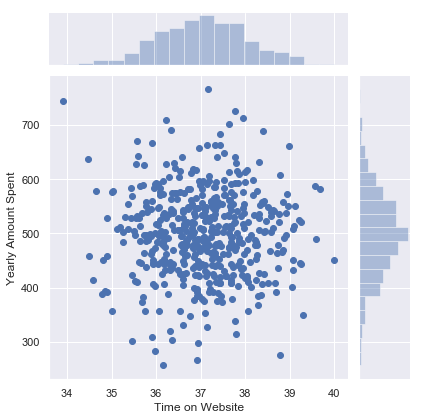

In [23]:
sns.set(rc={'figure.figsize':(12,8)})
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

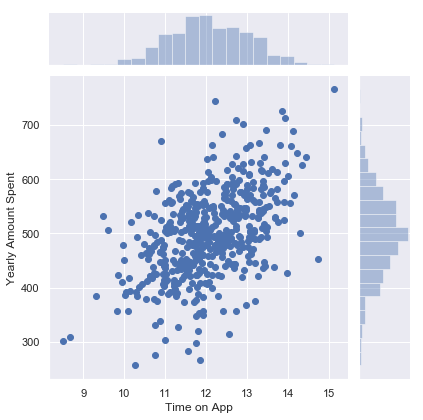

In [24]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent')

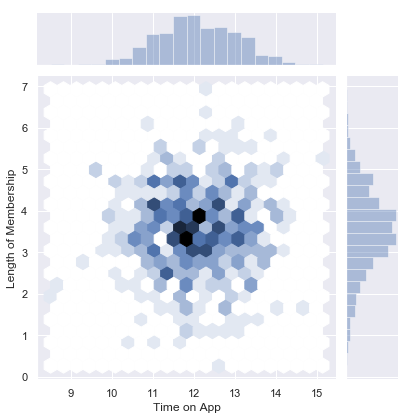

In [25]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex')

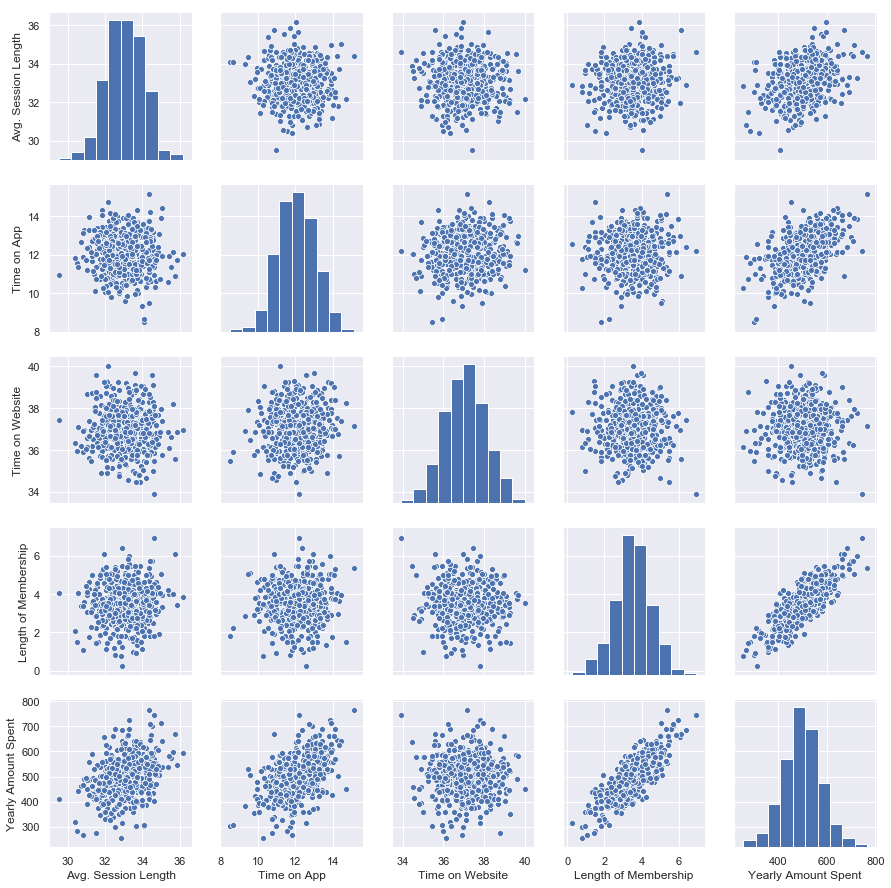

In [26]:
sns.pairplot(customers)

Based off this plot, we can assure that Length of Membership is very correlated to Yearly Amount Spent

In [27]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


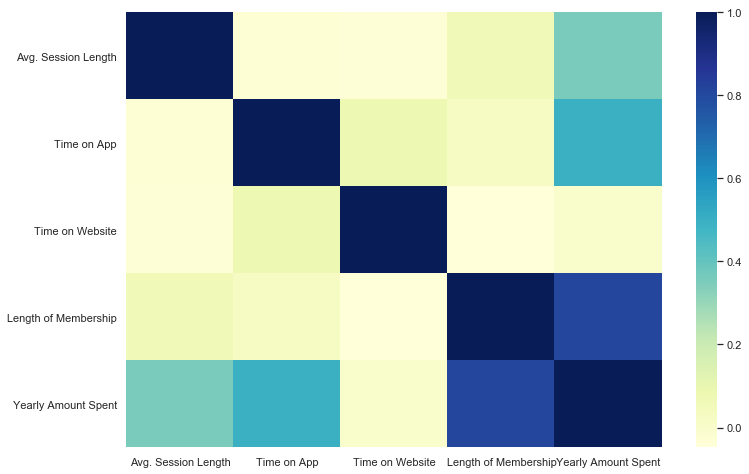

In [29]:
sns.heatmap(customers.corr(), cmap='YlGnBu')

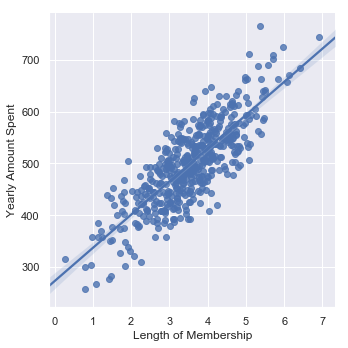

In [33]:
sns.lmplot(data=customers, x='Length of Membership' ,y='Yearly Amount Spent')

____________
# Training and Testing Data

In [34]:
#first: check all valid columns

In [35]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [42]:
y = customers['Yearly Amount Spent']

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

_______

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

____________
# Predicting Test Data

In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 18 to 259
Data columns (total 4 columns):
Avg. Session Length     150 non-null float64
Time on App             150 non-null float64
Time on Website         150 non-null float64
Length of Membership    150 non-null float64
dtypes: float64(4)
memory usage: 5.9 KB


In [74]:
predictions = lm.predict(X_test)

In [75]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [77]:
y_test.head()

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
Name: Yearly Amount Spent, dtype: float64

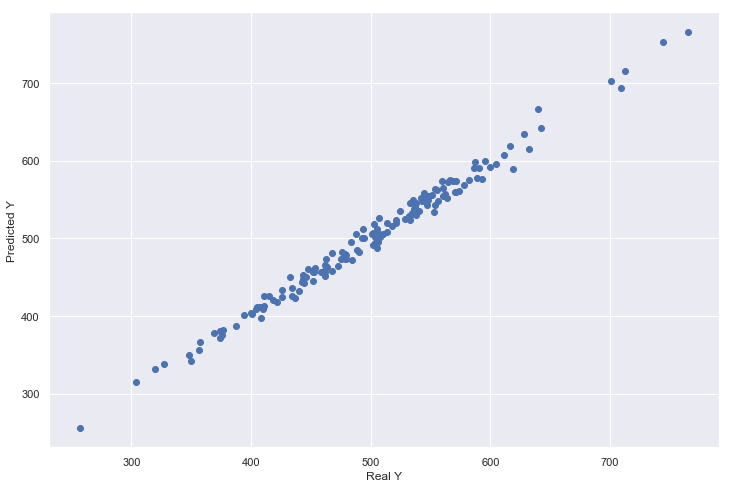

In [86]:
plt.ylabel('Predicted Y')
plt.xlabel('Real Y')
plt.scatter(y_test, predictions)

# Evaluating the model

In [87]:
from sklearn import metrics

In [93]:
print('MAE: ' + str(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430835
MSE: 79.81305165097467
RMSE: 8.933815066978646


In [94]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

# Residuals

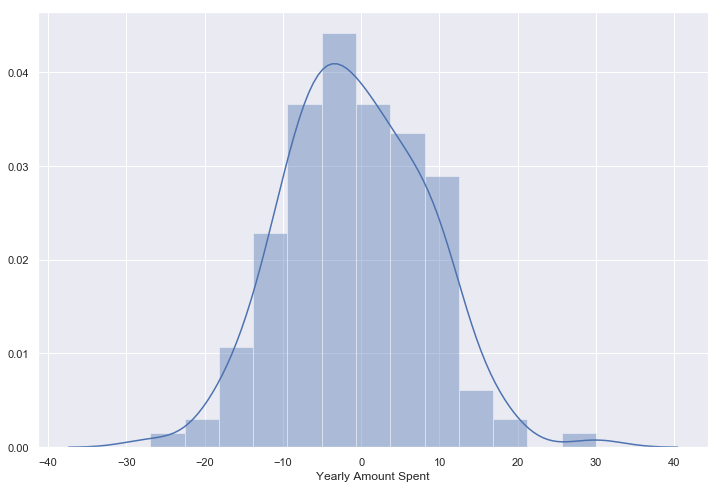

In [99]:
sns.distplot((y_test-predictions))

In [102]:
coeff = pd.DataFrame(lm.coef_, X.columns)

In [103]:
coeff

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


So basically, a unit increase of each of these columns represent a X amount of dollars on the Yearly Amount Spent column.
However, it is tricky to say if the company should invest in the App or Website

The reason why it is tricky is because there are two interpretations:
    
    1) Focus on the Mobile App because it is already bringing good results
    2) Focus on the Website so it may catchup
    
And this tricky question shows the importance of knowing the context of the enterprise

This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!